<a href="https://colab.research.google.com/github/hritvikgupta/Movie-Review-Mining-using-NLP/blob/master/Movie_review_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import nltk
from nltk import FreqDist
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
!pip install pyLDAvis

In [37]:
pd.set_option('display.max_colwidth', 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

##Library for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
df_imdb = pd.read_csv("/content/drive/My Drive/Trend-Prediction-NLP/imdb_master.csv", encoding = 'latin-1')

In [39]:
df_imdb.head()

,Unnamed: 0,type,review,label,file
0,0,test,"Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the charact...",neg,0_2.txt
1,1,test,"This is an example of why the majority of action films are the same. Generic and boring, there's really nothing worth watching here. A complete waste of the then barely-tapped talents of Ice-T and...",neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who could'nt act if they had a gun pressed against their foreheads. All they do is curse and shoot each other and acting like clichÃ©'e version of gangst...",neg,10001_1.txt
3,3,test,"Not even the Beatles could write songs everyone liked, and although Walter Hill is no mop-top he's second to none when it comes to thought provoking action movies. The nineties came and social pla...",neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word for them) really are somewhat brassy. Their alluring visual qualities are reminiscent of expensive high class TV commercials. But unfortunately Brass p...,neg,10003_3.txt


## Data Preprocessing 

In [40]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'words': list(fdist.keys()), 'count':list(fdist.values())})

  ## Selecting top 20 most frequent words
  d = words_df.nlargest(columns = 'count', n = terms)
  plt.figure(figsize = (20,5))
  ax = sns.barplot(data = d, x = 'words', y = 'count')
  ax.set(ylabel = 'count')
  plt.show()

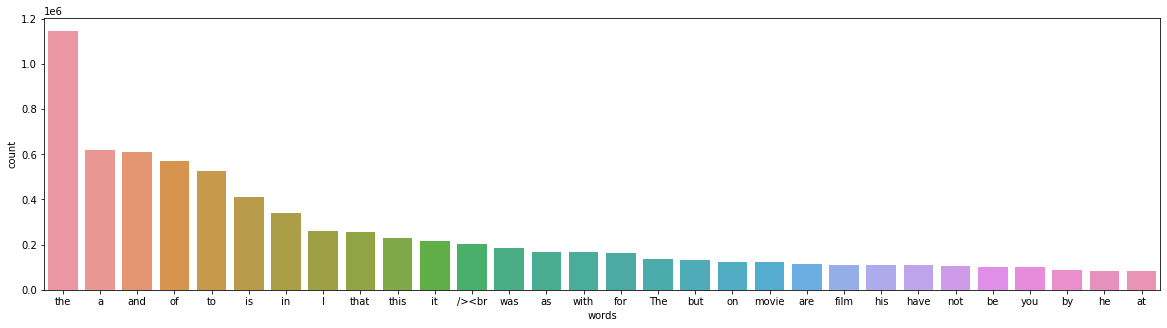

In [41]:
freq_words(df_imdb['review'])

In [42]:
df_imdb['review'].values

array(["Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.",
       "This is an example of why the majority of action films are the same. Generic and 

In [43]:
#### Cleaninig Data and removing the short words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import string
import re
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
lemmer = nltk.stem.WordNetLemmatizer()
#Function to remove the stopwords
def clean_text(text):
  text = ''.join([words.lower() for words in text if words not in string.punctuation])
  tokens = re.split('\W+', text)  
  text = " ".join([lemmer.lemmatize(w) for w in tokens if w not in stop_words])
  return text

df_imdb['review']=df_imdb['review'].apply(lambda x: clean_text(x))

<input>:5: DeprecationWarning: invalid escape sequence \W
<input>:5: DeprecationWarning: invalid escape sequence \W
<input>:5: DeprecationWarning: invalid escape sequence \W
<input>:5: DeprecationWarning: invalid escape sequence \W
<input>:5: DeprecationWarning: invalid escape sequence \W
<input>:5: DeprecationWarning: invalid escape sequence \W
<input>:5: DeprecationWarning: invalid escape sequence \W
<input>:5: DeprecationWarning: invalid escape sequence \W
<input>:5: DeprecationWarning: invalid escape sequence \W
<input>:5: DeprecationWarning: invalid escape sequence \W
<input>:5: DeprecationWarning: invalid escape sequence \W
<input>:5: DeprecationWarning: invalid escape sequence \W
<input>:5: DeprecationWarning: invalid escape sequence \W
<input>:5: DeprecationWarning: invalid escape sequence \W
<input>:5: DeprecationWarning: invalid escape sequence \W
<ipython-input-44-ea045854415b>:5: DeprecationWarning: invalid escape sequence \W
  tokens = re.split('\W+', text)


KeyboardInterrupt: ignored

In [ ]:
freq_words(df_imdb['review'])



### Data cleaning by hand

In [45]:
# remove stopwords
def remove_stopwords(rev):
  rev_new = ' '.join([i for i in rev if i not in stop_words])
  return rev_new

#remove the short words
df_imdb['review'] = df_imdb['review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df_imdb['review']]

## make the entire text lower case
reviews = [r.lower() for r in reviews] 

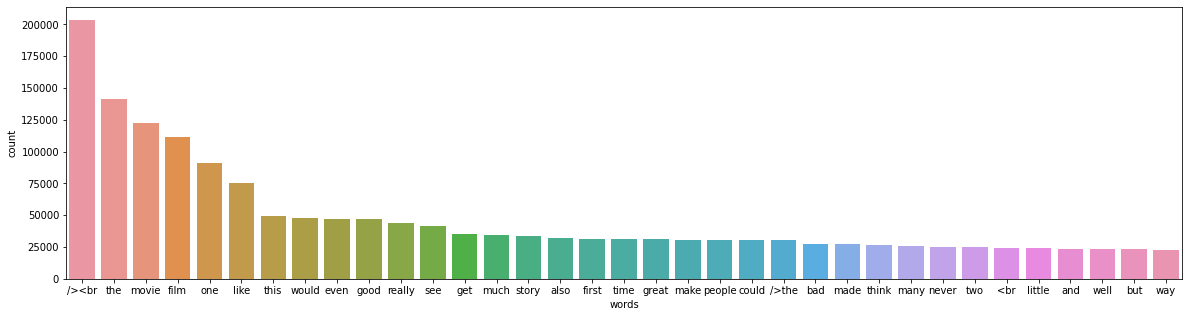

In [46]:
freq_words(reviews,35)

In [47]:
## TO removw furthur noise we use lemmatization form the spicy library
!pythom -m spacy download en 

/bin/bash: pythom: command not found


In [48]:
nlp = spacy.load('en', disable = ['parser', 'ner'])
def lemmatization(texts, tags = ['NOUN', 'ADJ']):
  output = []
  for sent in texts:
    doc = nlp(' '.join(sent))
    output.append([token.lemma_ for token in doc if token.pos_ in tags])
  return output

In [49]:
tokenized_reviews  = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['this', 'example', 'majority', 'action', 'films', 'same.', 'generic', 'boring,', "there's", 'really', 'nothing', 'worth', 'watching', 'here.', 'complete', 'waste', 'barely-tapped', 'talents', 'ice-t', 'ice', 'cube,', "who've", 'proven', 'many', 'times', 'capable', 'acting,', 'acting', 'well.', "don't", 'bother', 'one,', 'see', 'new', 'jack', 'city,', 'ricochet', 'watch', 'new', 'york', 'undercover', 'ice-t,', 'boyz', 'hood,', 'higher', 'learning', 'friday', 'ice', 'cube', 'see', 'real', 'deal.', "ice-t's", 'horribly', 'cliched', 'dialogue', 'alone', 'makes', 'film', 'grate', 'teeth,', "i'm", 'still', 'wondering', 'heck', 'bill', 'paxton', 'film?', 'and', 'heck', 'always', 'play', 'exact', 'character?', 'from', 'aliens', 'onward,', 'every', 'film', "i've", 'seen', 'bill', 'paxton', 'playing', 'exact', 'irritating', 'character,', 'least', 'aliens', 'character', 'died,', 'made', 'somewhat', 'gratifying...<br', '/><br', '/>overall,', 'second-rate', 'action', 'trash.', 'there', 'countless'

In [50]:
review_2 = lemmatization(tokenized_reviews)
review_2[1]

['example',
 'majority',
 'action',
 'film',
 'same',
 'generic',
 'boring',
 'worth',
 'complete',
 'waste',
 'talent',
 'ice',
 't',
 'ice',
 'cube',
 'many',
 'time',
 'capable',
 'acting',
 'undercover',
 'hood',
 'high',
 'learning',
 'ice',
 'cube',
 'real',
 'deal',
 'ice',
 'dialogue',
 'film',
 'grate',
 'tooth',
 'exact',
 'character',
 'alien',
 'film',
 'exact',
 'character',
 'least',
 'alien',
 'character',
 'second',
 'rate',
 'action',
 'trash',
 'countless',
 'well',
 'film',
 'judgement',
 'night',
 'carbon',
 'well',
 'script',
 'thing',
 'worth',
 'decent',
 'hand',
 'camera',
 'cinematography',
 'refreshing',
 'horrible',
 'film']

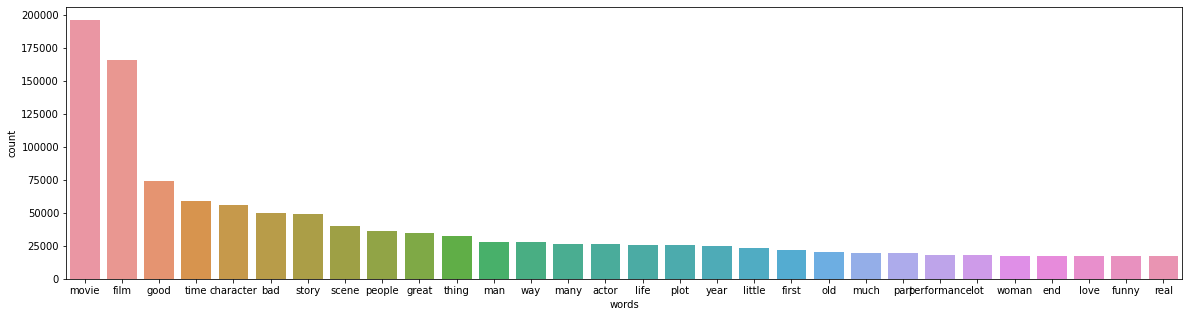

In [51]:
review_3=[]
for i in range(len(review_2)):
  review_3.append(' '.join(review_2[i]))

df_imdb['review_'] = review_3

freq_words(df_imdb['review_'])

## Building the LDA model


In [52]:
## we will start by creating the term sictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(review_2)

#Then we will convert the list of review(review_2) into the document term matrix using the dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(rev) for rev in review_2]

## Creating the objext for LDA model uing genism library
LDA = gensim.models.ldamodel.LdaModel

# Build the lda model
lda_model = LDA(corpus = doc_term_matrix, id2word = dictionary, num_topics = 7, random_state = 100, chunksize= 1000, passes = 50)


Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

In [53]:
lda_model.print_topics()

[(0,
  '0.020*"war" + 0.011*"american" + 0.010*"-" + 0.009*"country" + 0.009*"people" + 0.008*"history" + 0.008*"world" + 0.007*"soldier" + 0.007*"western" + 0.007*"black"'),
 (1,
  '0.018*"life" + 0.016*"movie" + 0.014*"man" + 0.013*"people" + 0.013*"woman" + 0.012*"family" + 0.011*"young" + 0.010*"story" + 0.010*"girl" + 0.009*"child"'),
 (2,
  '0.103*"film" + 0.018*"character" + 0.015*"story" + 0.011*"time" + 0.010*"good" + 0.009*"scene" + 0.008*"director" + 0.007*"many" + 0.007*"plot" + 0.006*"way"'),
 (3,
  '0.019*"role" + 0.018*"performance" + 0.017*"great" + 0.017*"good" + 0.011*"actor" + 0.010*"love" + 0.009*"music" + 0.007*"man" + 0.007*"beautiful" + 0.007*"young"'),
 (4,
  '0.143*"movie" + 0.036*"bad" + 0.030*"good" + 0.018*"time" + 0.012*"thing" + 0.012*"people" + 0.010*"character" + 0.010*"actor" + 0.010*"story" + 0.010*"scene"'),
 (5,
  '0.033*"show" + 0.022*"funny" + 0.020*"comedy" + 0.015*"episode" + 0.014*"time" + 0.014*"series" + 0.013*"good" + 0.013*"game" + 0.011*"ch

## Topics Visualization

In [55]:
#Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.082836 -0.019173       1        1  26.263365
4     -0.168115 -0.079716       2        1  20.259211
1     -0.003468 -0.099765       3        1  15.283789
6      0.020671 -0.164533       4        1  14.219824
3     -0.053985  0.273051       5        1  11.352776
5     -0.109293  0.065138       6        1   6.977478
0      0.397026  0.024999       7        1   5.643566, topic_info=        Term           Freq          Total Category  logprob  loglift
11     movie  189860.000000  189860.000000  Default  30.0000  30.0000
41      film  163325.000000  163325.000000  Default  29.0000  29.0000
368      bad   51383.000000   51383.000000  Default  28.0000  28.0000
20      show   14031.000000   14031.000000  Default  27.0000  27.0000
189     good   71021.000000   71021.000000  Default  26.0000  26.0000
...      ...            ...            ...      ...      ...      ...
87    people    2960.158691   36818.722656   Topic7  -4.7456   0.3539
256     fact    1818.334229   14895.283203   Topic7  -5.2330   0.7715
1280   force    1198.336426    2715.524414   Topic7  -5.6499   2.0566
985     side    1144.460205    5239.654297   Topic7  -5.6960   1.3533
130      man    1166.909912   27394.515625   Topic7  -5.6765  -0.2813

[518 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
242       1  0.346212       -
242       2  0.021608       -
242       3  0.041395       -
242       4  0.185245       -
242       5  0.112592       -
...     ...       ...     ...
323       7  0.037306    year
470       3  0.637712   young
470       4  0.063849   young
470       5  0.298352   young
4033      4  0.999877  zombie

[963 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 2, 7, 4, 6, 1])